# Esame Laboratorio di Programmazione II - 27/06/2025


## Esercizio 1

Crea un array NumPy con i prezzi (in euro) di 5 libri: **14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30**

1. Calcola il prezzo medio dei libri
2. Seleziona i libri con un prezzo maggiore della media.
3. Crea un nuovo array che applica uno sconto del 10% solo ai libri che costano più della media.

In [63]:
import numpy as np

arr = np.array([14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30])
med = arr.mean()
print("Prezzo medio dei libri = ", med, "euro.")
sup_med = arr[arr > med]
print("Libri di cui il prezzo è maggiore della media: ", sup_med)
new_arr = np.where(arr > med, arr*1.10, arr)
print("Array dopo lo sconto di 10%: ", new_arr)

Prezzo medio dei libri =  18.983000000000004 euro.
Libri di cui il prezzo è maggiore della media:  [22.5  31.2  24.9  19.99 27.3 ]
Array dopo lo sconto di 10%:  [14.99  24.75   9.75  18.    34.32  12.8   27.39   8.4   21.989 30.03 ]


## Esercizio 2

Simula 1000 lanci di una moneta che ad ogni lancio ha il doppio di probabilità di risultare croce invece che testa. Ogni lancio è rappresentato da 1 (testa) o 0 (croce).

1. Crea un array NumPy contenente i risultati.
2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
3. Crea un grafico della proporzione cumulativa nel tempo (dopo 50 lanci, dopo 100, dopo 150,...).

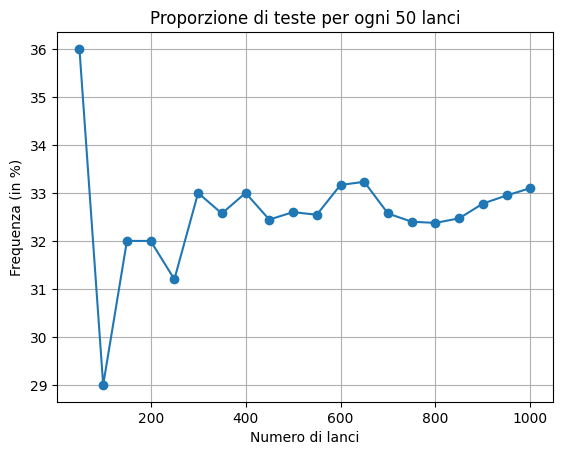

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

#1
np.random.seed(0)
campione = np.random.choice([0,1],size=1000 ,p=[2/3, 1/3])
#2
lanci = np.arange(50,1001,50)
freq = np.array([campione[:i].mean()*100 for i in range(50,1001,50)])
#3
plt.plot(lanci, freq, marker="o")
plt.title("Proporzione di teste per ogni 50 lanci")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenza (in %)")
plt.grid(True)
plt.show()

## Esercizio 3

Crea una funzione di nome **mat_normalizzata** che prende come input una matrice e ritorna la matrice normalizzata.

La funzione deve quindi:
1. Calcolare la media e la deviazione standard della matrice.
2. Normalizzare la matrice sottraendo la media e dividendo per la deviazione standard.

Testa La funzione con un array NumPy 6x10 con numeri campionati da una distribuzione normale (media=5, std=2).

In [65]:
np.random.seed(0)

def mat_normalizzata(mat):
    return (mat- np.mean(mat))/np.std(mat)

mat = np.random.normal(5, 2, size=(6,10))
test = mat_normalizzata(mat)
test

array([[ 1.59211176,  0.305225  ,  0.85113789,  2.04202918,  1.68977326,
        -0.99443723,  0.82410594, -0.21514976, -0.1697294 ,  0.31507675],
       [ 0.06357207,  1.29982368,  0.64572944,  0.04246649,  0.34646329,
         0.24249588,  1.33738174, -0.2659131 ,  0.22305274, -0.87821021],
       [-2.48118117,  0.54437542,  0.74328982, -0.77259933,  2.06926103,
        -1.44458764, -0.0291636 , -0.24895356,  1.37389679,  1.3140572 ],
       [ 0.07386027,  0.28447217, -0.90999801, -1.94129505, -0.4006068 ,
         0.07518268,  1.08848739,  1.06215247, -0.43779603, -0.3575726 ],
       [-1.06168797, -1.41217925, -1.6822691 ,  1.76829203, -0.55321465,
        -0.48567821, -1.25439841,  0.66125312, -1.5951123 , -0.27306702],
       [-0.91724514,  0.29271867, -0.55430251, -1.18630972, -0.0989295 ,
         0.33180886, -0.00957698,  0.2130552 , -0.67084544, -0.41459854]])

## Esercizio 4

Utilizza il dataset `books.csv`.

1. **Crea una nuova colonna** chiamata `engagement_score`, definita come:

   $$
   \texttt{engagement\_score} = \texttt{average\_rating} \times \log_{10}(1 + \texttt{ratings\_count})
   $$

   *(Un indicatore che tiene conto sia della qualità (valutazione media), sia della quantità di voti. Il logaritmo serve ad attenuare l'effetto dei libri estremamente popolari.)*

2. Trova il **libro con il valore massimo** di `engagement_score`.

3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.

4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`.

5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.


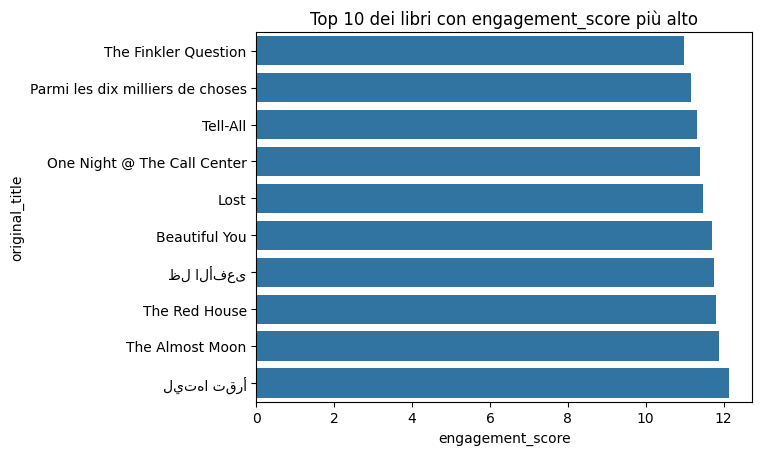

In [66]:
import pandas as pd

df = pd.read_csv("books.csv")
#1
df["engagement_score"] = df["average_rating"]*np.log10(1 + df["ratings_count"])

#2
max = df["engagement_score"].max()
libro_max = df["original_title"][df["engagement_score"] == max]
# print("Libro con il valore massimo di engagement_score: ", libro_max[1])

#3
filtr_lib = df.loc[df["average_rating"] > 4.5, "original_title"]
# print("Libri con una valutazione media maggiore di 4.5:\n")
# print(filtr_lib)

#4
top_10 =  df.sort_values(by="engagement_score", ascending=True).head(11)

sns.barplot(x="engagement_score", y="original_title", data=top_10)
plt.title("Top 10 dei libri con engagement_score più alto")
plt.show()



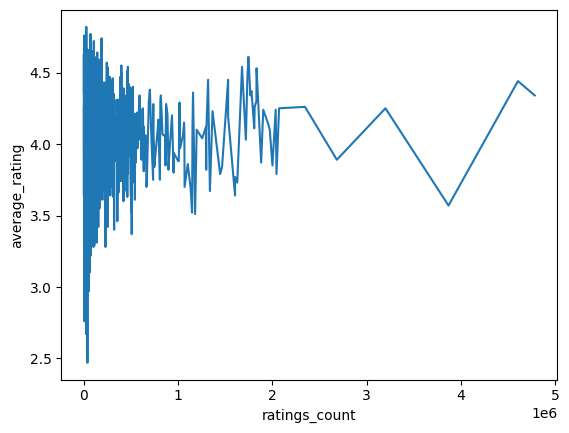

In [67]:
#5
sort_df = df.sort_values(by="ratings_count", ascending=False)
sns.lineplot(y="average_rating", x="ratings_count", data=sort_df)
plt.title("")
plt.show()

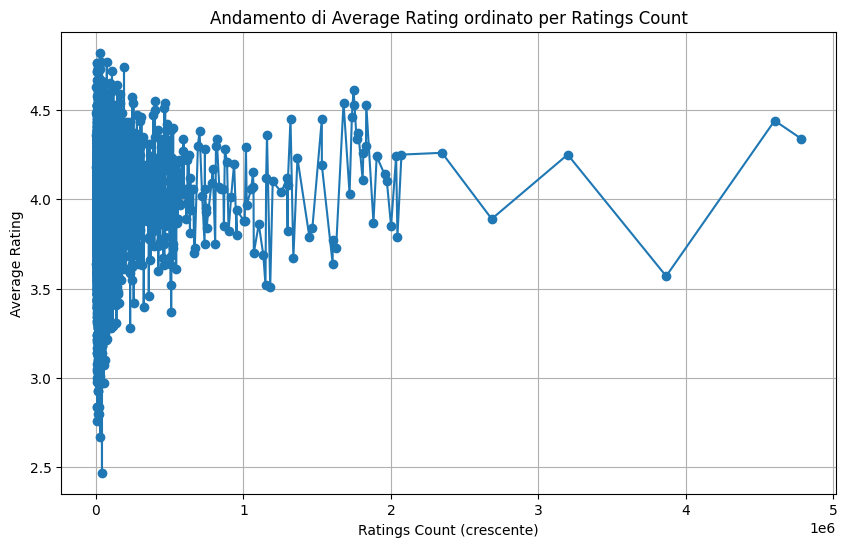

In [68]:
df_sorted = df.sort_values(by="ratings_count", ascending=True)

plt.figure(figsize=(10,6))
plt.plot(df_sorted["ratings_count"], df_sorted["average_rating"], marker="o", linestyle="-")
plt.xlabel("Ratings Count (crescente)")
plt.ylabel("Average Rating")
plt.title("Andamento di Average Rating ordinato per Ratings Count")
plt.grid(True)
plt.show()

## Esercizio 5
Utilizza il dataset `adult.csv`.
Contiene informazioni demografiche su adulti negli Stati Uniti. Le colonne rilevanti sono:
- `age`: età (integer)
- `workclass`, `education`, `marital-status`, `occupation`, `race`, `sex`
- `hours-per-week`: ore lavorate a settimana
- `income`: `>50K` o `<=50K` (target)

1. Quante **righe e colonne** ha il dataset?
2. Quanti **valori mancanti** ci sono per colonna?
3. **Sostituisci i valori mancanti** nelle colonne categoriche (workclass, occupation, native-country) con il valore più frequente (la moda).
4. Calcola l’**età media** (`age`) per sesso (`sex`)
5. Trova la % di persone che guadagnano **>50K** per sesso.
7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.
8. **Crea**:
   - un grafico **a barre** con % di reddito `>50K` per fascia di età.
   - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).


C:\Users\kasse\AppData\Local\Temp\ipykernel_23260\924893822.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_eta = dataset.groupby("age_group")["income"].apply(lambda x: (x == " >50K").mean()*100)


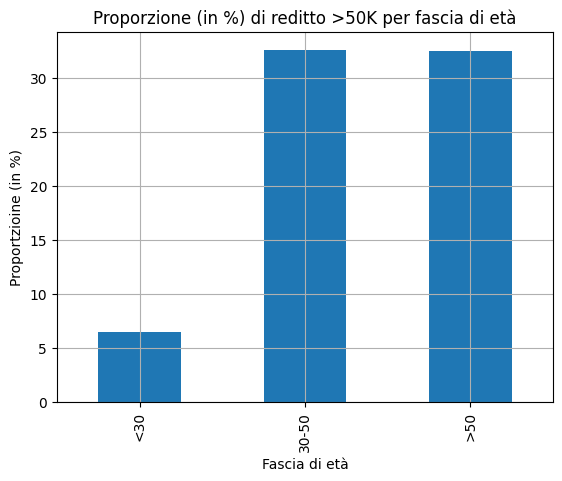

In [69]:
dataset = pd.read_csv("adult_con_titoli.csv")
#1
# print(f"Il dataset ha {dataset.shape[0]} righe e {dataset.shape[1]} colonne.")

#2
# print("Colonne mancante per colonna:")
# print(dataset.isnull().sum())

#3
dataset["workclass"] = np.where(dataset["workclass"].isna(), dataset["workclass"].mode()[0], dataset["workclass"])
dataset["occupation"] = dataset["occupation"].fillna(dataset["occupation"].mode()[0])
dataset["native-country"] = dataset["native-country"].fillna(dataset["native-country"].mode()[0])

#4
eta_sesso = dataset.groupby("sex")["age"].mean()
# print("Eta media per sesso : ")
# print(eta_sesso)

#5
proporzione = dataset.groupby("sex")["income"].apply(lambda x: (x == " >50K").mean()*100)
# print("Proporzione di personne che guadagnano >50K per sesso")
# print(proporzione)

# sup50k = dataset.groupby("sex")["income"].value_counts().reset_index()
# male = sup50k.loc[(sup50k["income"] == " >50K")&(sup50k["sex"] == " Male")]
# index_m = sup50k["count"][sup50k["sex"] == " Male"].sum()
# female = sup50k.loc[(sup50k["income"] == " >50K")&(sup50k["sex"] == " Female")]
# index_f = sup50k["count"][sup50k["sex"] == " Female"].sum()
# freq_m = male["count"]/index_m*100
# freq_f = female["count"]/index_f*100
# freq_m, freq_f

#6
dataset["age_group"] = pd.cut(dataset["age"], bins=[0, 30, 50, np.max(dataset["age"])], labels=["<30", "30-50", ">50"])

#7
prop_eta = dataset.groupby("age_group")["income"].apply(lambda x: (x == " >50K").mean()*100)

plt.Figure(figsize=(10,6))
prop_eta.plot(kind="bar")
plt.title("Proporzione (in %) di reditto >50K per fascia di età")
plt.xlabel("Fascia di età")
plt.ylabel("Proportzioine (in %)")
plt.grid(True)
plt.show()

C:\Users\kasse\AppData\Local\Temp\ipykernel_23260\675213785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x="income", y="hours-per-week", palette="Set2")


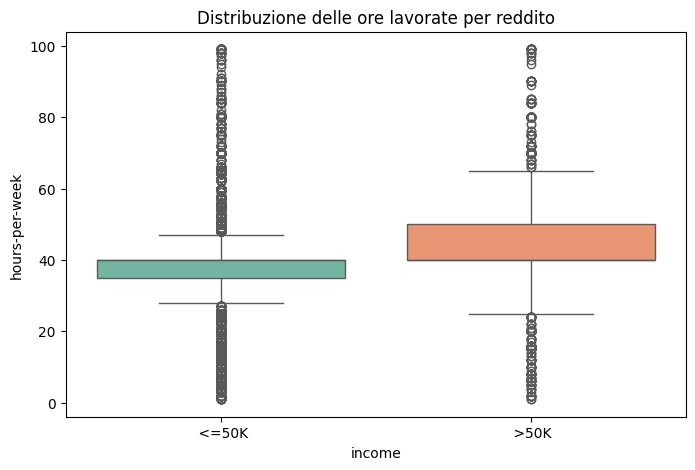

In [73]:
plt.figure(figsize=(8,5))
sns.boxplot(data=dataset, x="income", y="hours-per-week", palette="Set2")
plt.title("Distribuzione delle ore lavorate per reddito")
plt.show()

In [ ]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30-50
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,30-50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30-50
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,>50
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,<30


## Esercizio 6

Genera due array:

`x = np.linspace(0, 5, 80)`  
`y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)`

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta.
2. Plotta i punti originali e la retta ottenuta.
3. Calcola MAE e RMSE tra i valori reali e quelli stimati.

I parametri della retta sono a= 2.383 e b= 1.477


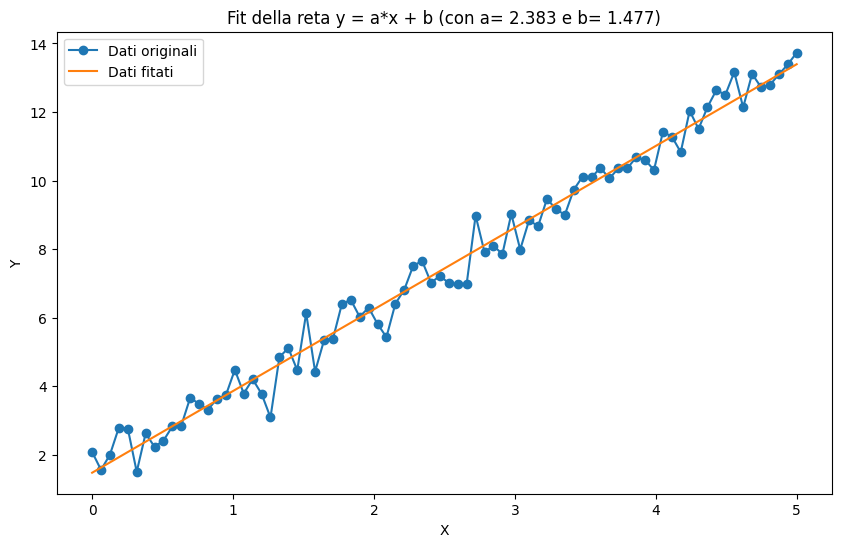

In [77]:
import scipy as sp

np.random.seed(0)
x = np.linspace(0, 5, 80)
y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)

def retta(x, a, b):
    return x*a+b

#1
parm, _ = sp.optimize.curve_fit(retta, x, y)
a, b = parm
print(f"I parametri della retta sono a= {a:.3f} e b= {b:.3f}")

#2
plt.figure(figsize=(10,6))
plt.plot(x, y,marker="o", label="Dati originali")
plt.plot(x, retta(x, a, b), label="Dati fitati")
plt.title(f"Fit della reta y = a*x + b (con a= {a:.3f} e b= {b:.3f})")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [80]:
#3
mae = sum(np.abs(y-retta(x, a, b)))/len(x)
rmse = np.sqrt(sum((y-retta(x, a, b))**2)/len(x))
print("MAE = ",mae)
print("RMSE = ",rmse)

MAE =  0.3685228442558933
RMSE =  0.47312036986250516


Parametri stimati: a = 2.509, b = 1.114


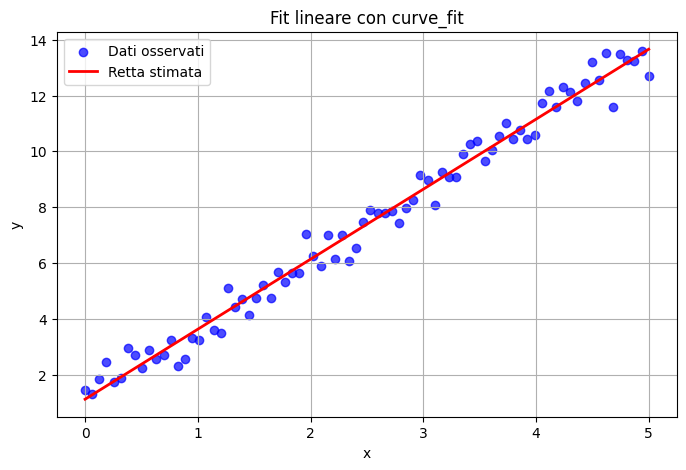

MAE  = 0.379
RMSE = 0.476


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Generazione dei dati
np.random.seed(0)  # per riproducibilità
x = np.linspace(0, 5, 80)
y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)

# 2. Definizione del modello (retta)
def retta(x, a, b):
    return a * x + b

# Fit con curve_fit
popt, pcov = curve_fit(retta, x, y)
a_hat, b_hat = popt
print(f"Parametri stimati: a = {a_hat:.3f}, b = {b_hat:.3f}")

# 3. Valori stimati
y_pred = retta(x, a_hat, b_hat)

# 4. Plot
plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Dati osservati", color="blue", alpha=0.7)
plt.plot(x, y_pred, color="red", linewidth=2, label="Retta stimata")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fit lineare con curve_fit")
plt.legend()
plt.grid(True)
plt.show()

# 5. Metriche di errore
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"MAE  = {mae:.3f}")
print(f"RMSE = {rmse:.3f}")
